# INTRODUCTION

We are a group of Quality Engineers in a linen manufacturer. “Linen is a textile made from the fibers of the flax plant. Linen is laborious to manufacture, but the fiber is very absorbent and garments made of linen are valued for their exceptional coolness and freshness in hot weather” (Source: Wikipedia). “Automation of the visual inspection for quality control in production of materials with textures (tiles, textile, leather, etc.) is not widely implemented. A sophisticated system for image acquisition, as well as a fast and efficient procedure for texture analysis is needed for this purpose” (Source: Rimac-Drlje, Snježana, Drago Žagar, and Slavko Rupčić. "Adaptive Image Processing Technique for Quality Control in Ceramic Tile Production." Strojarstvo 52.2 (2010): 205-215.)


As the first part of the project, we are requested to work with any surface (i.e. desk, wall, curtain, sweater and etc.) we would like. We would like to apply median filtering in order to detect and decrease the noise in our image. Median filtering is very widely used in digital image processing because, under certain conditions it preserves edges of the images while removing noise and its a nonlinear local filter whose output value is the middle element of a sorted array of pixel values from the filter window. (Source: Rasheed, Asmaa Hameed; “Effect of different window size on median filter performance with variable noise densities”; 2017)


# Importing necessary packages

# Part 1

In [1]:
import pandas as pd 
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)

## 1) Reading the image
For this task, Phyton is preferred and the photo was taken from a shirt. Because the modules cv2, and matplotlib uses the BGR channeling I converted the photo to RGB channeling.

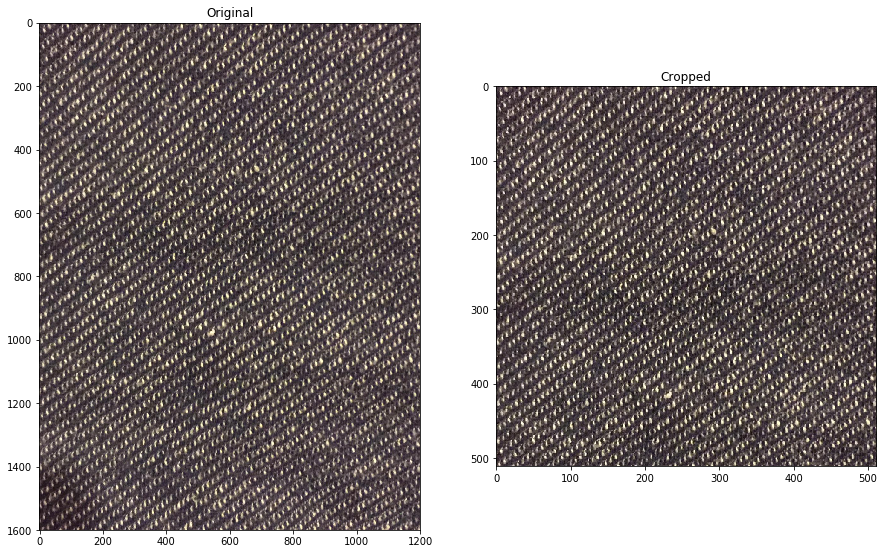

In [2]:
project_path="C:/Users/Sthesk/Desktop/IE423-Group-5/HW1/"
linen=cv2.imread(project_path+"linen.jpeg")
linen=cv2.cvtColor(linen,cv2.COLOR_BGR2RGB)
linen_cropped=cv2.imread(project_path+"linen_cropped.jpg")
linen_cropped=cv2.cvtColor(linen_cropped,cv2.COLOR_BGR2RGB)
fig,ax=plt.subplots(1,2,figsize=(15,20))
ax[0].set_title("Original")
ax[1].set_title("Cropped")
ax[0].imshow(linen)
ax[1].imshow(linen_cropped)

## 2.a) The structure
The structure of the variable that stores the image is a matrix which has a vector of 3 elements for each particular location. These elements can take integer values from 0 to 255. The dimension of the variable that stores the image is three. These dimensions are width, length, and number of layers (i.e. 512,512,3). 

In [3]:
linen_cropped.shape

(512, 512, 3)

## 2.b) Each channel of the image

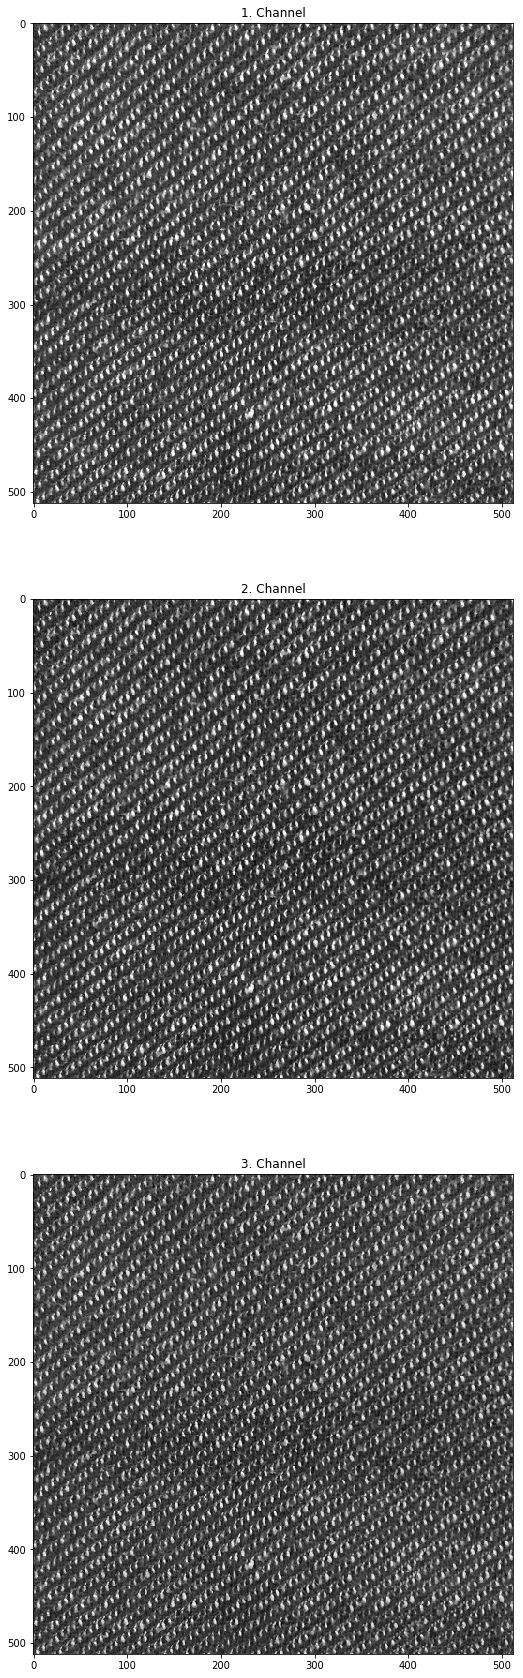

In [4]:
def print_channels(image):
    first,second,third=image[:,:,0],image[:,:,1],image[:,:,2]
    fig,ax=plt.subplots(3,figsize=(20,30))
    for i,el in enumerate([first,second,third]):
        ax[i].imshow(el,cmap="gray")
        ax[i].set_title("{}. Channel".format(i+1))
    plt.pause(0.01)
print_channels(linen_cropped)

## 3) Plotting the average of each channel
For each channel, we took the average of the columns and plotted the average as a line plot for each channel on a single plot. 

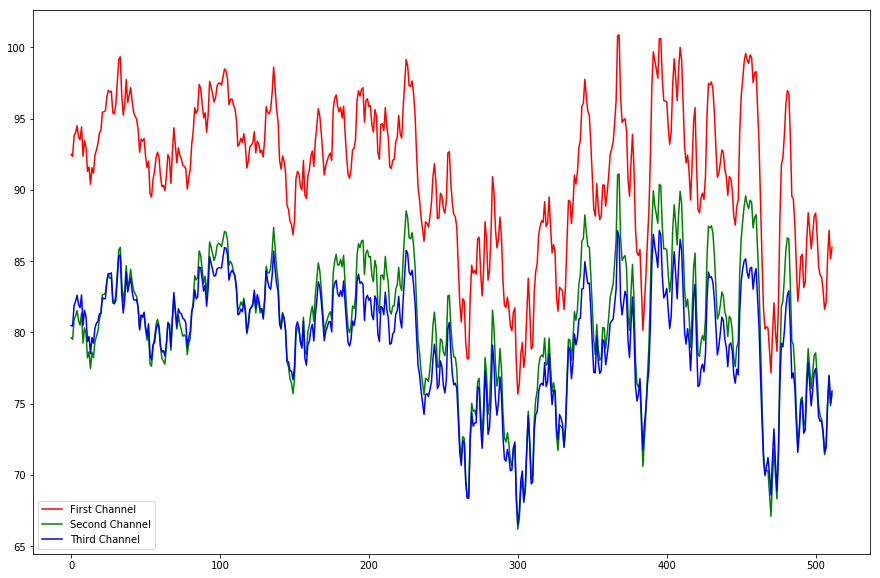

In [5]:
first,second,third=linen_cropped[:,:,0],linen_cropped[:,:,1],linen_cropped[:,:,2]
fig,ax=plt.subplots(1,figsize=(15,10))
sns.lineplot(y=[first[i].mean() for i in range(512)],x=list(range(512)),color="red",ax=ax)
sns.lineplot(y=[second[i].mean() for i in range(512)],x=list(range(512)),color="green",ax=ax)
sns.lineplot(y=[third[i].mean() for i in range(512)],x=list(range(512)),color="blue",ax=ax)
ax.legend(["First Channel","Second Channel","Third Channel"])

## 4) Subtracting the halves from the others
For each channel, we subtracted one half of the image from the other half and we displayed the new image. We executed same processes for both horizontal and vertical axis.

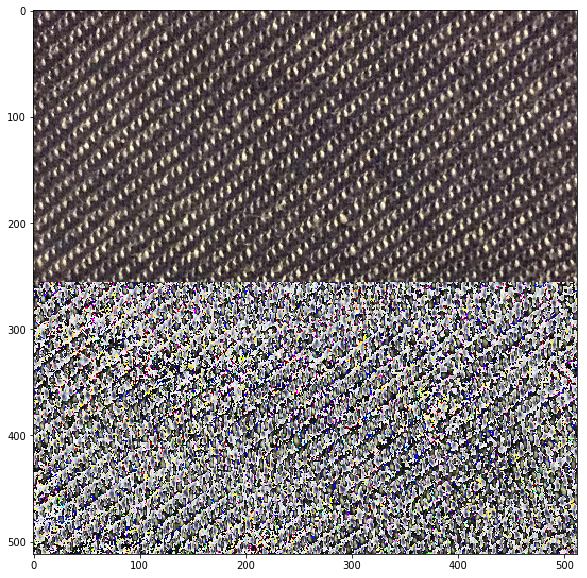

In [6]:
linen_half=linen_cropped.copy()
linen_half[256:512,:,0]=linen_half[256:512,:,0]-linen_half[:256,:,0]
linen_half[256:512,:,1]=linen_half[256:512,:,1]-linen_half[:256,:,1]
linen_half[256:512,:,2]=linen_half[256:512,:,2]-linen_half[:256,:,2]
plt.figure(figsize=(15,10))
plt.imshow(linen_half)

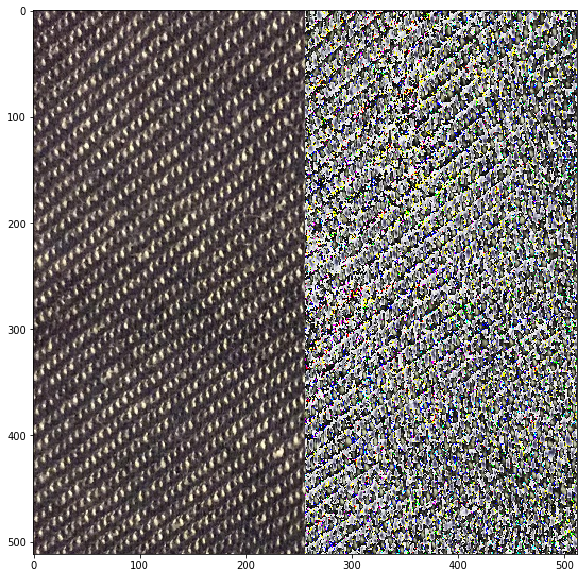

In [7]:
linen_v_half=linen_cropped.copy()
linen_v_half[:,256:512,0]=linen_v_half[:,256:512,0]-linen_v_half[:,:256,0]
linen_v_half[:,256:512,1]=linen_v_half[:,256:512,1]-linen_v_half[:,:256,1]
linen_v_half[:,256:512,2]=linen_v_half[:,256:512,2]-linen_v_half[:,:256,2]
plt.figure(figsize=(15,10))
plt.imshow(linen_v_half)

## 5) Median Filtering
Median filtering is applied to reduce noise for the image. We applied median filtering to each channel with different window sizes and compared the results. The noise evaluation measure increase as the window size increases. Larger window size gives more blurred results but it does not mean that the performance of larger window size is worse, since the effect of noise filtering is much better than smaller window size. As the window size increases, the image gets more blurry since pixels are filtered a lot more than they are filtered with smaller window sizes. We can conclude that larger window size shows an improved performance in noise filtering even though the image seems more blurry.

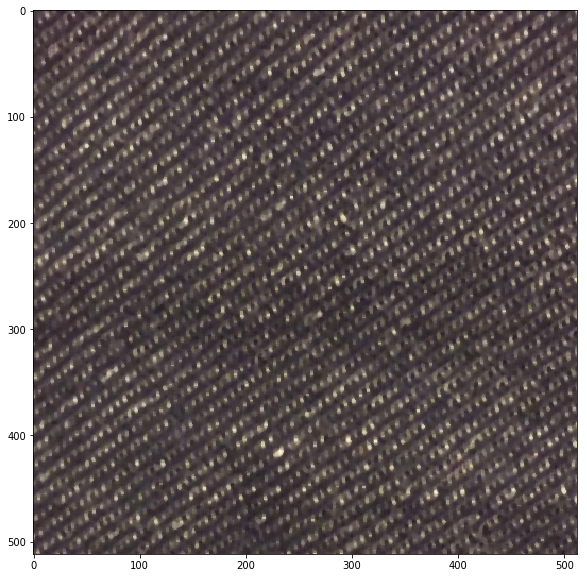

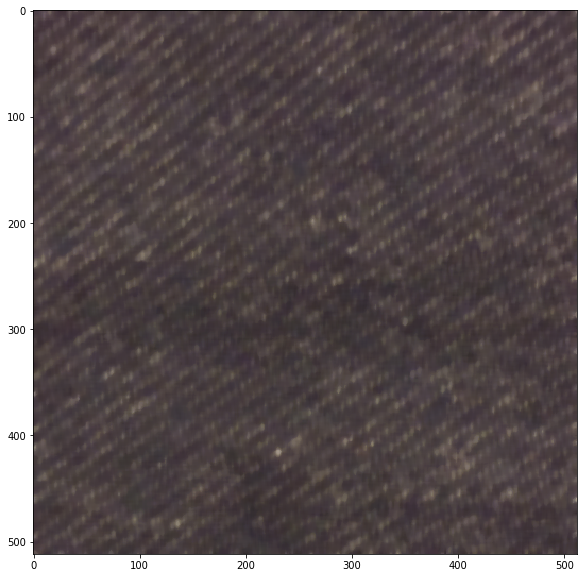

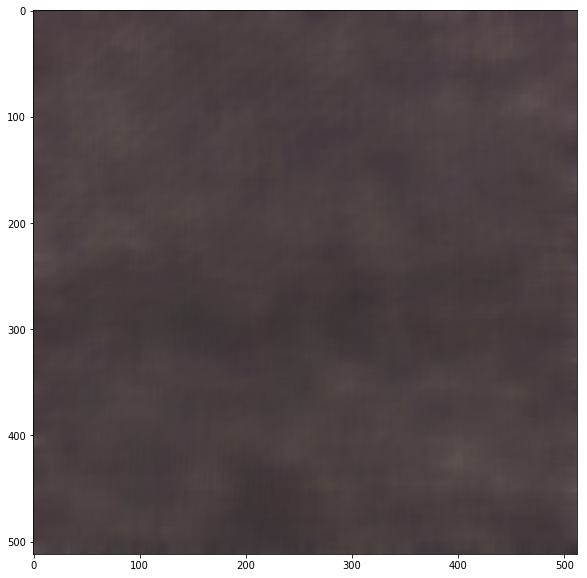

In [8]:
for window_size in [5,11,31]:
    linen_median = cv2.medianBlur(linen_cropped, window_size)
    plt.figure(figsize=(15,10))
    plt.imshow(linen_median)
    plt.pause(0.001)

# Part 2

Converting the image to greyscale

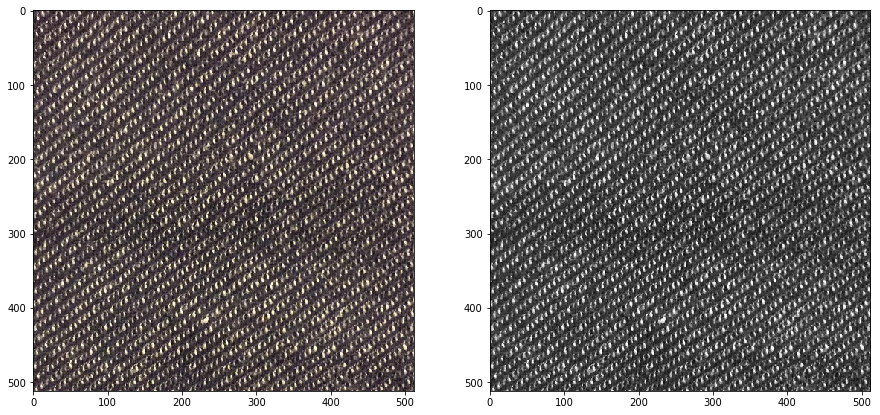

In [9]:
linen_greyscale=cv2.cvtColor(linen_cropped,cv2.COLOR_RGB2GRAY)
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(linen_cropped)
ax[1].imshow(linen_greyscale,cmap='gray')

## 1) Plotting the histogram of pixel values of the image

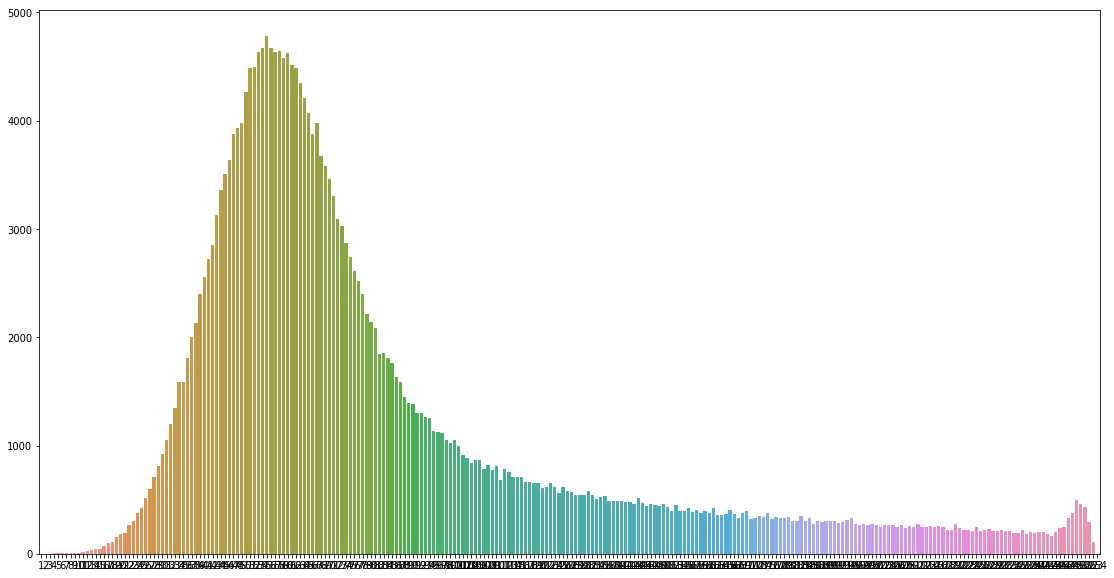

In [10]:
vals,counts=np.unique(linen_greyscale.flatten(),return_counts=True)
plt.figure(figsize=(19,10))
sns.barplot(x=vals,y=counts)

## 2) Proposed distribution of the image's pixel values
We observed fitted plots Gamma,Normal,Chi-Squared and Skew-Normal distributions and we concluded that pixel values follow Skew-Normal distribution with the parameters a=9.68, loc=39.62, scale=42.61.

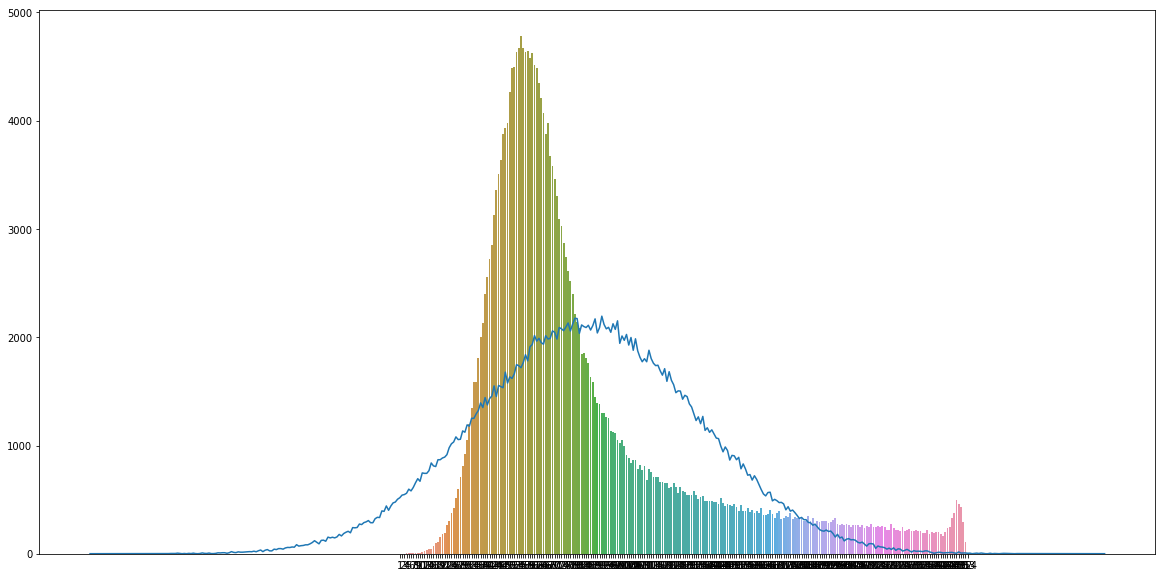

In [11]:
simuls=np.random.normal(loc=linen_greyscale.mean(),scale=linen_greyscale.std(),size=linen_greyscale.size)
simuls=np.rint(simuls)
val_sim,count_sim=np.unique(simuls,return_counts=True)
plt.figure(figsize=(20,10))
vals,counts=np.unique(linen_greyscale.flatten(),return_counts=True)
sns.barplot(x=vals,y=counts)
sns.lineplot(x=val_sim,y=count_sim)

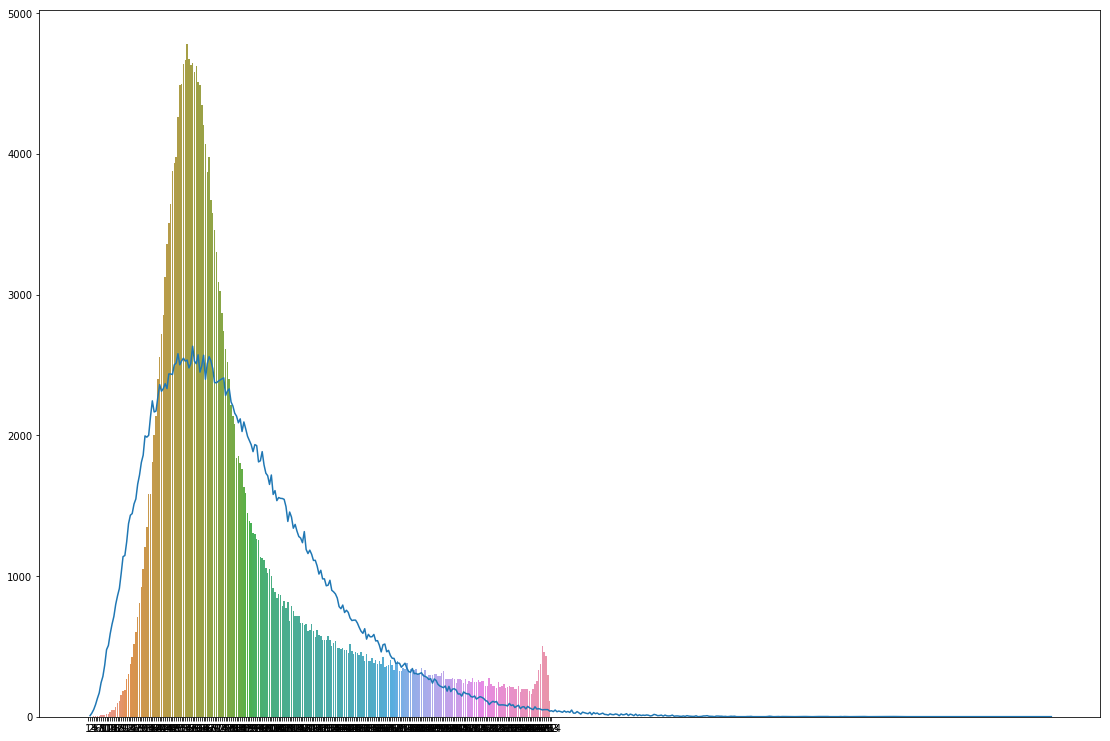

In [12]:
mu_=linen_cropped.mean()
std_=linen_cropped.std()
mu_,std_
vals,counts=np.unique(linen_greyscale.flatten(),return_counts=True)
plt.figure(figsize=(19,13))
sns.barplot(x=vals,y=counts)
shape, scale = (mu_/std_)**2, (std_**2)/mu_ 
simuls = np.random.gamma(shape, scale, linen_greyscale.size)
simuls=np.rint(simuls)
val_sim,count_sim=np.unique(simuls,return_counts=True)
sns.lineplot(x=val_sim,y=count_sim)

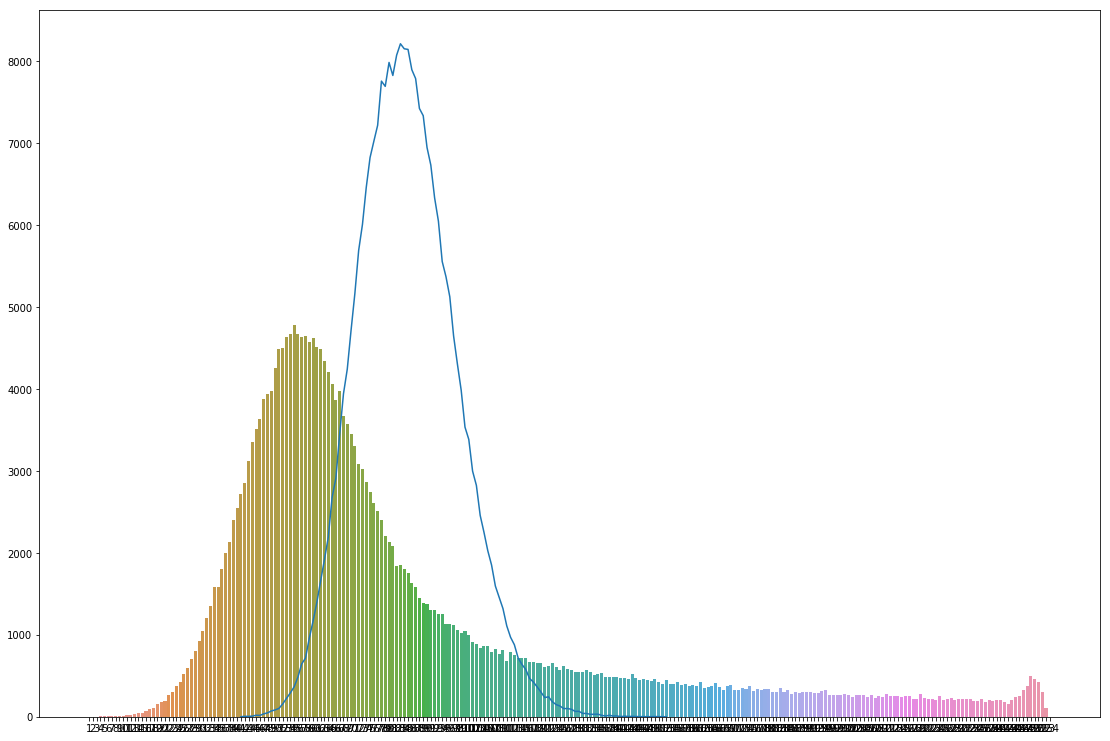

In [13]:
vals,counts=np.unique(linen_greyscale.flatten(),return_counts=True)
plt.figure(figsize=(19,13))
sns.barplot(x=vals,y=counts)
simuls=np.rint(np.random.chisquare(mu_,linen_greyscale.size))
val_sim,count_sim=np.unique(simuls,return_counts=True)
sns.lineplot(x=val_sim,y=count_sim)

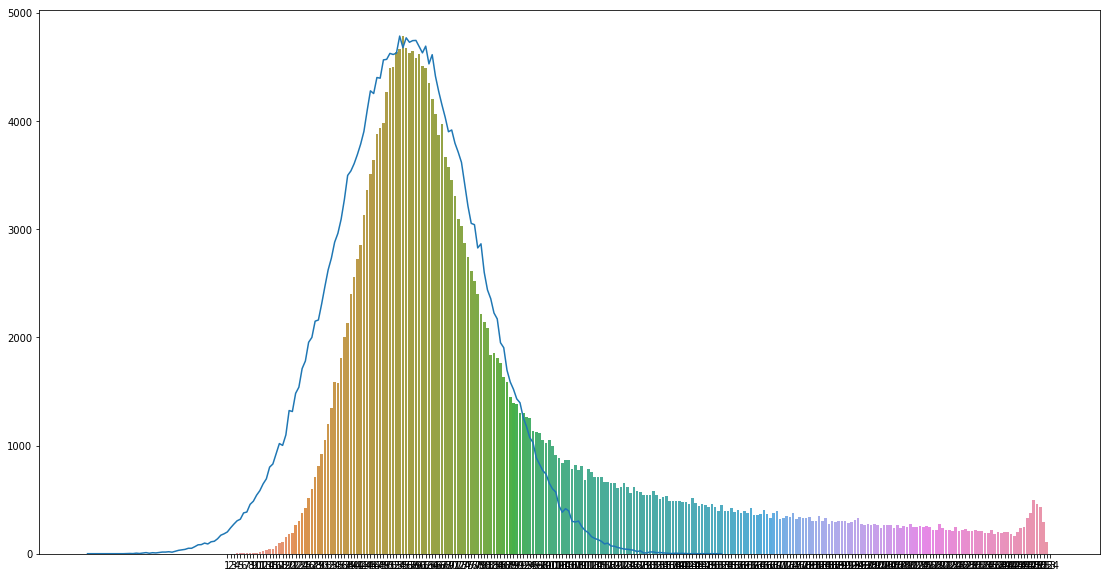

In [14]:
simuls=np.random.normal(loc=55,scale=22,size=linen_greyscale.size)
simuls=np.rint(simuls)
val_sim,count_sim=np.unique(simuls,return_counts=True)
plt.figure(figsize=(19,10))
vals,counts=np.unique(linen_greyscale.flatten(),return_counts=True)
sns.barplot(x=vals,y=counts)
sns.lineplot(x=val_sim,y=count_sim)

Skewed-Normal distribution seemed to be better fit for our case.

In [15]:
from scipy.stats import gamma
from scipy import stats
a,loc,scale=stats.skewnorm.fit(linen_greyscale.flatten())
a,loc,scale

(9.677242956919297, 31.62063060312591, 71.61028098104404)


Pixel values follow Skew-Normal distribution with the parameters a=9.68, loc=39.62, scale=42.61.

In [16]:
a,loc,scale=a, loc+8, scale-29
a,loc,scale

(9.677242956919297, 39.62063060312591, 42.61028098104404)

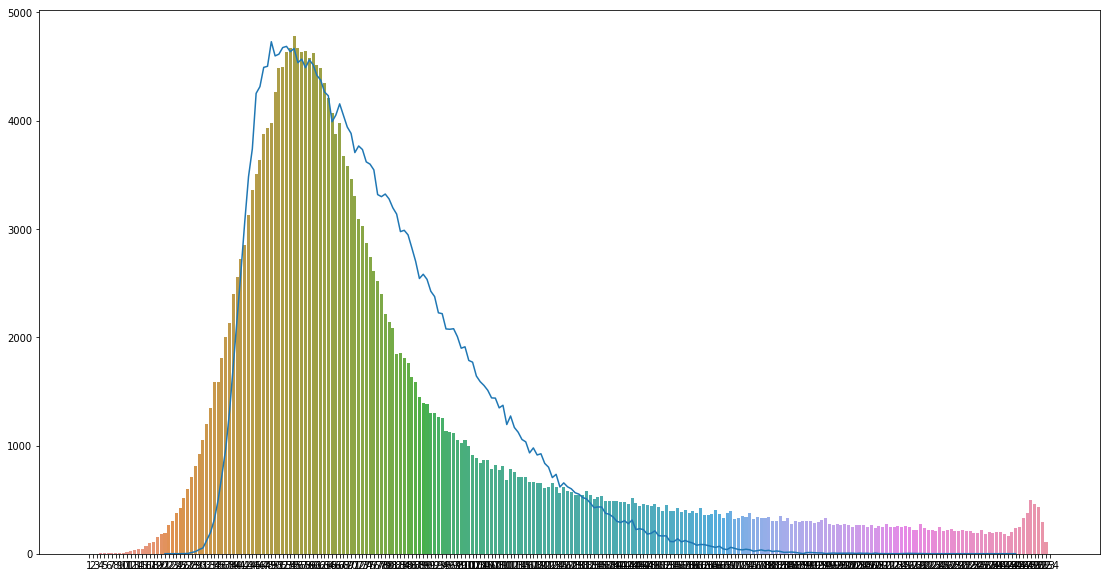

In [17]:
valss,countss=np.unique(linen_greyscale.flatten(),return_counts=True)
plt.figure(figsize=(19,10))
simuls=stats.skewnorm(a, loc, scale).rvs(linen_greyscale.size)
vals,counts=np.unique(np.rint(simuls),return_counts=True)
sns.barplot(x=valss,y=countss)
sns.lineplot(x=vals,y=counts)

In [18]:
upper_bound=stats.skewnorm.ppf(1-0.001,a,loc,scale)
lower_bound=stats.skewnorm.ppf(0.001,a,loc,scale)

print("Lower and Upper Bound {} , {}".format(lower_bound,upper_bound))

Lower and Upper Bound 31.458300245876547 , 179.83089920763112


## 3) The outliers of the image
First, we found a lower and upper bound that leave 0.001 of the observations on the smaller and larger side of the Skew-Normal distribution. Then we extracted the pixels which are out of the bounds. To make better comparison on results, we plotted histogram of the image which includes 0’s instead of outlier pixel values. As expected, the variance decreased and the new image has balanced pixel values.

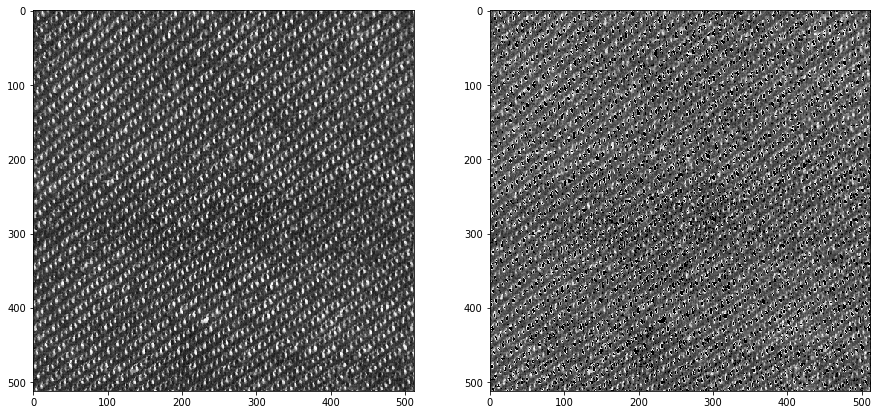

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(linen_greyscale,cmap="gray")
ax[1].imshow(np.where((lower_bound<=linen_greyscale)&(linen_greyscale<=upper_bound),linen_greyscale,0),cmap="gray")

## 4) Finding the outliers of the patches of the image
We observed that the variance of image in part 3-a is smaller than the variance of the image which is applied quality test for each 51x51 patches since the outliers in patches (small size) are not detected in quality control process of large size image. Some portion of the pixels is detected as outliers and replaced with black pixels on the patches would not have been an outlier on the original image and would have remained the same. Thus the patch process identified more pixels as outlier and replaced them with black pixels, resulting in more black pixels on the whole image. This is a result of difference of parameters when we are sampling and do not consider the image as a whole.
Since the number of pixels fell into outlier portion on each patch increased, as a result number of zeros(black color)increased. In conclusion, we see that the image has more black pixels than previous one.


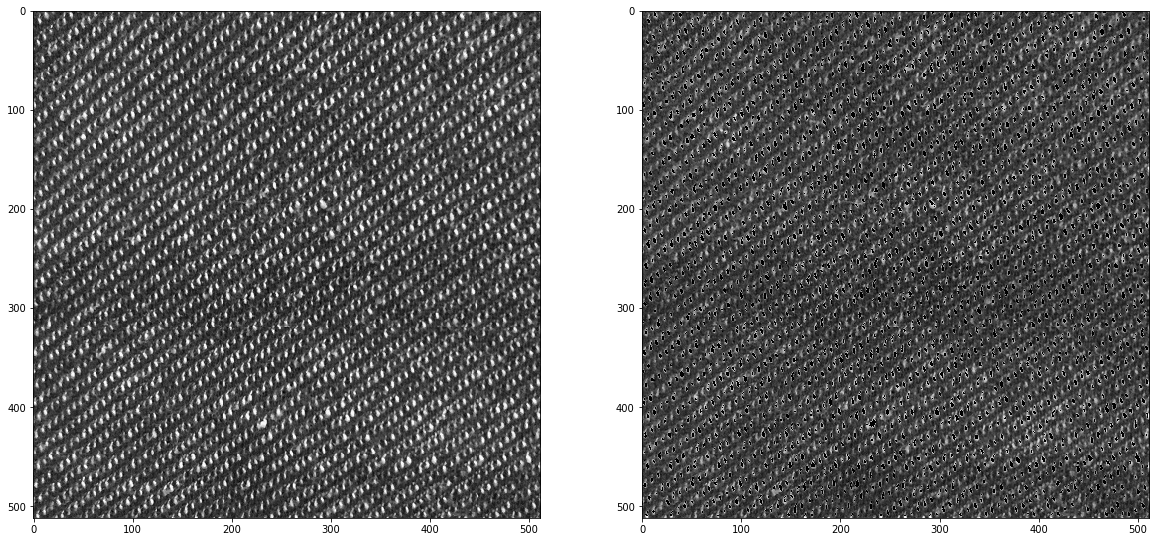

In [20]:
linen_greyscale_patch=linen_greyscale.copy()
range_=np.arange(0,512,51)
for i,el_i in enumerate(range_[:-1]):
    for j,el_j in enumerate(range_[:-1]):
        patch=linen_greyscale_patch[el_i:range_[i+1],el_j:range_[j+1]]
        a,loc,scale=stats.skewnorm.fit(patch.flatten())
        a,loc,scale=a,loc-10,scale-20
#         simuls=stats.skewnorm(a, loc-10, scale-20).rvs(patch.size)
#         vals_sim,counts_sim=np.unique(np.rint(simuls),return_counts=True)
        upper_bound=stats.skewnorm.ppf(1-0.001,a,loc,scale)
        lower_bound=stats.skewnorm.ppf(0.001,a,loc,scale)
        linen_greyscale_patch[el_i:range_[i+1],el_j:range_[j+1]]=np.where((lower_bound<=patch)&(patch<=upper_bound),patch,0)
#         vals,counts=np.unique(patch.flatten(),return_counts=True)
#         plt.figure(figsize=(19,10))
#         sns.barplot(x=vals,y=counts)
#         sns.lineplot(x=vals_sim,y=counts_sim)
fig,ax=plt.subplots(1,2,figsize=(20,30))
ax[0].imshow(linen_greyscale,cmap="gray")
ax[1].imshow(linen_greyscale_patch,cmap="gray")